In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers,models,Sequential

In [2]:
dataset_url ='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [3]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
!pwd          # prints current working directory
!ls -la       # lists files in it


/content
total 20
drwxr-xr-x 1 root root 4096 Oct  6 15:45 .
drwxr-xr-x 1 root root 4096 Oct  6 15:44 ..
drwxr-xr-x 4 root root 4096 Oct  2 13:36 .config
drwxr-xr-x 3 root root 4096 Oct  6 15:45 datasets
drwxr-xr-x 1 root root 4096 Oct  2 13:36 sample_data


In [5]:
print(data_dir)                 # should show /content/datasets/flower_photos


./datasets/flower_photos


In [6]:
data_dir

'./datasets/flower_photos'

In [7]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [9]:
from pathlib import Path
data_dir = Path(data_dir) / "flower_photos"


In [10]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/flower_photos/dandelion/17903104293_9138439e76.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/4622115595_a0de9f2013_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/17075803866_aeeded2637.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/8689302980_9bd2f7b9fe_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/3730618647_5725c692c3_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/7004645518_ff0f862eff_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/8980273068_cf7e8b880a_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/19617425002_b914c1e2ab.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/19067907051_16d530c7d2.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/3419172904_7708414ae9_n.jpg'),
 PosixPath('d

In [11]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [12]:
roses=list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/flower_photos/roses/2409069862_b128ee2a71.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15699509054_d3e125286f_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/319298955_0c72bd36bf.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2065522422_cfdd80044a_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/9433167170_fa056d3175.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1788484468_

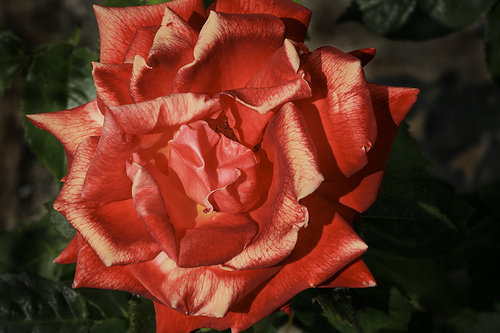

In [13]:
PIL.Image.open(str(roses[10]))

In [14]:
flowers_images_dict={
   'roses': list(data_dir.glob('roses/*')),
   'daisy': list(data_dir.glob('daisy/*')),
   'dandelion': list(data_dir.glob('dandelion/*')),
   'sunflowers': list(data_dir.glob('sunflowers/*')),
   'tulips': list(data_dir.glob('tulips/*')),
}



flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/flower_photos/daisy/517054467_d82d323c33_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3703643767_dee82cdef9_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2901376034_cdb4bac26b_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/4837182901_69a6cc782b_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5133243796_44de429de5_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3999978867_c67c79597f_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/7377004908_5bc0cde347_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2479956481_8d1a9699be_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2513618768_ff7c004796_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/525780443_bba812c26a_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/14221848160_7f0a37c395.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/10

In [15]:
flower_labels_dict={
    'roses':0, 'daisy':1,'dandelion':2,'sunflowers':3, 'tulips':4
}

In [16]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/2409069862_b128ee2a71.jpg'

array([[[163, 186, 218],
        [158, 183, 215],
        [160, 188, 219],
        ...,
        [114, 151, 203],
        [113, 152, 204],
        [114, 153, 205]],

       [[164, 187, 219],
        [156, 181, 213],
        [155, 183, 214],
        ...,
        [115, 152, 204],
        [110, 149, 201],
        [111, 150, 202]],

       [[160, 183, 215],
        [156, 181, 213],
        [160, 188, 219],
        ...,
        [113, 150, 202],
        [113, 150, 202],
        [112, 151, 203]],

       ...,

       [[121, 188, 221],
        [110, 185, 224],
        [112, 185, 229],
        ...,
        [  4,  26, 104],
        [  7,  27, 105],
        [  8,  28, 106]],

       [[129, 196, 227],
        [123, 196, 234],
        [122, 193, 237],
        ...,
        [  6,  35, 116],
        [  7,  36, 117],
        [  9,  36, 117]],

       [[123, 193, 223],
        [119, 194, 232],
        [119, 193, 235],
        ...,
        [ 18,  45, 132],
        [ 18,  45, 132],
        [ 16,  43, 130]]], dtype=uint8)
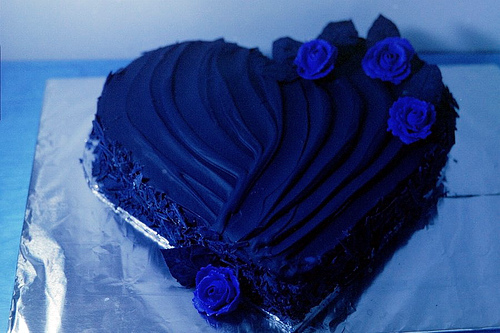

In [17]:
img=cv2.imread(str(flowers_images_dict['roses'][4]))
img

In [18]:
img.shape

(333, 500, 3)

In [19]:
X,y=[],[]
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [20]:
X=np.array(X)
y=np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
len(X_train), len(X_test)

(2936, 734)

In [22]:
X_train.shape


(2936, 180, 180, 3)

In [23]:
X_train_scale= X_train/255
X_test_scale=X_test/255

In [24]:
from keras import Input
num_classes =5

model=Sequential([
    Input(shape=(180,180,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')



])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_scale,y_train , epochs=5)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.3658 - loss: 1.4143
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6011 - loss: 0.9918
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6618 - loss: 0.8516
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7462 - loss: 0.6482
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8416 - loss: 0.4659


In [26]:
model.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.5533 - loss: 287.4753


[290.82318115234375, 0.5504087209701538]

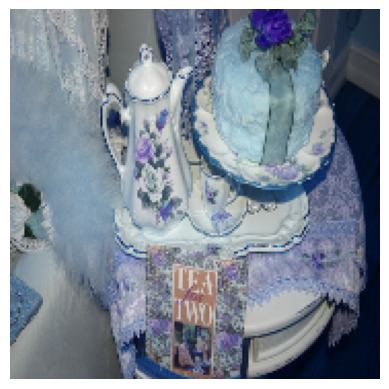

In [33]:
plt.axis('off')
plt.imshow(X[0])

In [34]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[1.44679321e+02, 1.56044785e+02, 1.62387390e+02],
        [1.49811569e+02, 1.60163437e+02, 1.65603943e+02],
        [1.52120972e+02, 1.63478683e+02, 1.67196991e+02],
        ...,
        [3.74740028e+01, 5.06882744e+01, 6.84029007e+01],
        [3.84967270e+01, 5.30755882e+01, 7.06478119e+01],
        [3.70591812e+01, 5.32948837e+01, 7.17414169e+01]],

       [[1.44830231e+02, 1.56352386e+02, 1.61654190e+02],
        [1.51025665e+02, 1.61797516e+02, 1.65569366e+02],
        [1.54006622e+02, 1.64358810e+02, 1.68909210e+02],
        ...,
        [3.69056358e+01, 5.20762215e+01, 7.02578125e+01],
        [3.71041107e+01, 5.24562912e+01, 7.06478119e+01],
        [3.62765961e+01, 5.30628853e+01, 7.12959518e+01]],

       [[1.46498795e+02, 1.57230713e+02, 1.62463013e+02],
        [1.52015121e+02, 1.62833527e+02, 1.66742722e+02],
        [1.53218536e+02, 1.63902328e+02, 1.68609268e+02],
        ...,
        [3.63907433e+01, 5.23242

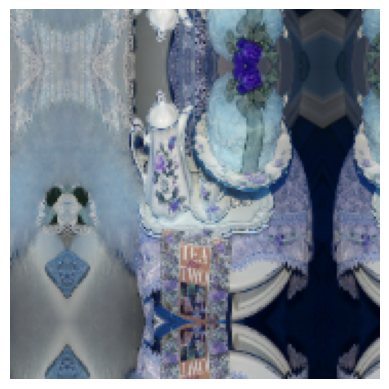

In [35]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [45]:
data_augmentation=keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.2)
])

In [46]:


from keras import Input
num_classes =5

model=Sequential([
    Input(shape=(180,180,3)),
    data_augmentation,#new
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),#new
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')



])

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_scale,y_train , epochs=5)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3378 - loss: 1.5079
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5771 - loss: 1.0876
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5642 - loss: 1.0394
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6163 - loss: 0.9799
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6411 - loss: 0.8958


In [48]:
model.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4397 - loss: 431.0601


[428.4151916503906, 0.4577656686306]